In [1]:
import pandas as pd

df = pd.read_csv('/content/sample_data/Student_performance_data _.csv')
display(df.head())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming 'Gender' is the target variable and other numerical columns are features.
# You might need to adjust the feature selection and target based on your specific dataset.

# Identify numerical columns for features
# Exclude 'StudentID' as it's likely just an identifier
feature_columns = df.select_dtypes(include=np.number).columns.tolist()
if 'StudentID' in feature_columns:
    feature_columns.remove('StudentID')

target_column = 'Gender' # Assuming 'Gender' is your binary target variable
if target_column in feature_columns:
    feature_columns.remove(target_column)

X = df[feature_columns]
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (1674, 13)
Testing features shape: (718, 13)
Training target shape: (1674,)
Testing target shape: (718,)


### Train a Classification Model
Let's train a simple Logistic Regression model as an example. You can replace this with any other classification algorithm.

In [3]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' for robustness with small datasets
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


### Make Predictions and Evaluate the Model
Now, we'll use the trained model to make predictions on the test set and evaluate its performance.

In [4]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.4944

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.29      0.36       359
           1       0.50      0.70      0.58       359

    accuracy                           0.49       718
   macro avg       0.49      0.49      0.47       718
weighted avg       0.49      0.49      0.47       718


Confusion Matrix:
 [[104 255]
 [108 251]]


## Testing a Regression Model

Now, let's prepare the data and train a regression model. We'll use 'GPA' as our target variable for this example.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Identify numerical columns for features
# Exclude 'StudentID' as it's likely just an identifier
feature_columns_reg = df.select_dtypes(include=np.number).columns.tolist()
if 'StudentID' in feature_columns_reg:
    feature_columns_reg.remove('StudentID')

# Define the target variable for regression
target_column_reg = 'GPA' # Assuming 'GPA' is your continuous target variable
if target_column_reg in feature_columns_reg:
    feature_columns_reg.remove(target_column_reg)

X_reg = df[feature_columns_reg]
y_reg = df[target_column_reg]

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

print(f"Regression Training features shape: {X_train_reg.shape}")
print(f"Regression Testing features shape: {X_test_reg.shape}")
print(f"Regression Training target shape: {y_train_reg.shape}")
print(f"Regression Testing target shape: {y_test_reg.shape}")

Regression Training features shape: (1674, 13)
Regression Testing features shape: (718, 13)
Regression Training target shape: (1674,)
Regression Testing target shape: (718,)


### Train a Linear Regression Model
We'll use a simple Linear Regression model for this demonstration.

In [6]:
# Initialize and train the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

print("Regression model training complete.")

Regression model training complete.


### Make Predictions and Evaluate the Regression Model
Now, let's make predictions on the test set and evaluate the model using regression-specific metrics.

In [7]:
# Make predictions on the test set
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluate the regression model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.1507
Mean Squared Error (MSE): 0.0351
Root Mean Squared Error (RMSE): 0.1874
R-squared (R2): 0.9583


# Task
Evaluate and compare the performance of the classification model (Logistic Regression) and the regression model (Linear Regression) based on their respective evaluation metrics, and summarize which model performed better for its specific task.

## Summarize Classification Model Performance

### Subtask:
Display the evaluation metrics (accuracy, classification report, and confusion matrix) for the classification model.


**Reasoning**:
The evaluation metrics for the classification model (accuracy, classification report, and confusion matrix) have already been computed and stored in the `accuracy`, `report`, and `conf_matrix` variables. The next step is to print these variables to display the model's performance.



In [8]:
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.4944

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.29      0.36       359
           1       0.50      0.70      0.58       359

    accuracy                           0.49       718
   macro avg       0.49      0.49      0.47       718
weighted avg       0.49      0.49      0.47       718


Confusion Matrix:
 [[104 255]
 [108 251]]


## Summarize Regression Model Performance

### Subtask:
Display the evaluation metrics (Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared) for the regression model.


**Reasoning**:
The evaluation metrics for the regression model (Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared) have already been computed and stored in the `mae`, `mse`, `rmse`, and `r2` variables. The next step is to print these variables to display the model's performance.



In [9]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.1507
Mean Squared Error (MSE): 0.0351
Root Mean Squared Error (RMSE): 0.1874
R-squared (R2): 0.9583


## Compare Model Performance

### Subtask:
Compare the evaluation metrics of the classification and regression models, highlighting their strengths and weaknesses based on their respective tasks and target variables.


### Classification Model Performance (Logistic Regression for 'Gender')

**Metrics:**
- **Accuracy:** 0.4944
- **Classification Report:**
```
               precision    recall  f1-score   support

           0       0.49      0.29      0.36       359
           1       0.50      0.70      0.58       359

    accuracy                           0.49       718
   macro avg       0.49      0.49      0.47       718
weighted avg       0.49      0.49      0.47       718
```
- **Confusion Matrix:**
```
 [[104 255]
 [108 251]]
```

**Analysis:**
- **Overall Accuracy** is very low at approximately 49.44%. This indicates that the model is performing barely better than random guessing (if classes were perfectly balanced, which they are here, 50% accuracy would be random). This suggests the features used are not highly predictive of Gender, or the model choice is not optimal for this task.
- **Precision for class 0 (e.g., Male):** 0.49, meaning when the model predicts class 0, it is correct 49% of the time.
- **Recall for class 0:** 0.29, meaning the model only identifies 29% of the actual class 0 instances.
- **Precision for class 1 (e.g., Female):** 0.50, meaning when the model predicts class 1, it is correct 50% of the time.
- **Recall for class 1:** 0.70, meaning the model successfully identifies 70% of the actual class 1 instances.
- The **Confusion Matrix** shows that out of 359 actual class 0 instances, only 104 were correctly classified (True Negatives), while 255 were incorrectly classified as class 1 (False Positives). For class 1, out of 359 actual instances, 251 were correctly classified (True Positives), and 108 were incorrectly classified as class 0 (False Negatives). The model has a strong bias towards predicting class 1, leading to a much higher recall for class 1 but very poor recall for class 0.
- **Weakness:** The classification model performs poorly, especially for class 0, indicating it struggles to distinguish between the two genders based on the given numerical features.

### Regression Model Performance (Linear Regression for 'GPA')

**Metrics:**
- **Mean Absolute Error (MAE):** 0.1507
- **Mean Squared Error (MSE):** 0.0351
- **Root Mean Squared Error (RMSE):** 0.1874
- **R-squared (R2):** 0.9583

**Analysis:**
- **MAE (0.1507):** On average, the model's predictions for GPA are about 0.15 points away from the actual GPA. This is a very low error, suggesting high accuracy in prediction.
- **MSE (0.0351) and RMSE (0.1874):** These metrics confirm the low error rate. RMSE, being in the same units as the target variable (GPA), shows that predictions are typically within ~0.19 GPA points of the actual values.
- **R-squared (0.9583):** An R-squared value of 0.9583 means that approximately 95.83% of the variance in 'GPA' can be explained by the independent variables in the model. This is an exceptionally high R-squared value, indicating that the model fits the data very well and has strong predictive power for GPA.
- **Strength:** The regression model performs exceptionally well, demonstrating a very strong ability to predict 'GPA' with high accuracy and explaining a significant portion of its variance.

### Comparison and Conclusion

Comparing the two models:

- The **Classification Model (Logistic Regression for 'Gender')** shows very poor performance. Its accuracy is close to random chance, and the confusion matrix highlights a significant imbalance in its ability to correctly identify instances of different classes. The features chosen are not effective for predicting 'Gender' in this dataset using a Logistic Regression model.

- The **Regression Model (Linear Regression for 'GPA')** demonstrates excellent performance. Its low error metrics (MAE, MSE, RMSE) and a very high R-squared value indicate that it is highly accurate in predicting 'GPA' and explains almost all the variability in GPA. This suggests that the chosen features are strong predictors of 'GPA', and Linear Regression is an appropriate model for this task.

**Conclusion:** The **Regression Model** performed significantly better than the Classification Model relative to its specific task. While the classification model struggled to predict 'Gender', the regression model was highly successful in predicting 'GPA'.

### Classification Model Performance (Logistic Regression for 'Gender')

**Metrics:**
- **Accuracy:** 0.4944
- **Classification Report:**
```
               precision    recall  f1-score   support

           0       0.49      0.29      0.36       359
           1       0.50      0.70      0.58       359

    accuracy                           0.49       718
   macro avg       0.49      0.49      0.47       718
weighted avg       0.49      0.49      0.47       718
```
- **Confusion Matrix:**
```
 [[104 255]
 [108 251]]
```

**Analysis:**
- **Overall Accuracy** is very low at approximately 49.44%. This indicates that the model is performing barely better than random guessing (if classes were perfectly balanced, which they are here, 50% accuracy would be random). This suggests the features used are not highly predictive of Gender, or the model choice is not optimal for this task.
- **Precision for class 0 (e.g., Male):** 0.49, meaning when the model predicts class 0, it is correct 49% of the time.
- **Recall for class 0:** 0.29, meaning the model only identifies 29% of the actual class 0 instances.
- **Precision for class 1 (e.g., Female):** 0.50, meaning when the model predicts class 1, it is correct 50% of the time.
- **Recall for class 1:** 0.70, meaning the model successfully identifies 70% of the actual class 1 instances.
- The **Confusion Matrix** shows that out of 359 actual class 0 instances, only 104 were correctly classified (True Negatives), while 255 were incorrectly classified as class 1 (False Positives). For class 1, out of 359 actual instances, 251 were correctly classified (True Positives), and 108 were incorrectly classified as class 0 (False Negatives). The model has a strong bias towards predicting class 1, leading to a much higher recall for class 1 but very poor recall for class 0.
- **Weakness:** The classification model performs poorly, especially for class 0, indicating it struggles to distinguish between the two genders based on the given numerical features.

### Regression Model Performance (Linear Regression for 'GPA')

**Metrics:**
- **Mean Absolute Error (MAE):** 0.1507
- **Mean Squared Error (MSE):** 0.0351
- **Root Mean Squared Error (RMSE):** 0.1874
- **R-squared (R2):** 0.9583

**Analysis:**
- **MAE (0.1507):** On average, the model's predictions for GPA are about 0.15 points away from the actual GPA. This is a very low error, suggesting high accuracy in prediction.
- **MSE (0.0351) and RMSE (0.1874):** These metrics confirm the low error rate. RMSE, being in the same units as the target variable (GPA), shows that predictions are typically within ~0.19 GPA points of the actual values.
- **R-squared (0.9583):** An R-squared value of 0.9583 means that approximately 95.83% of the variance in 'GPA' can be explained by the independent variables in the model. This is an exceptionally high R-squared value, indicating that the model fits the data very well and has strong predictive power for GPA.
- **Strength:** The regression model performs exceptionally well, demonstrating a very strong ability to predict 'GPA' with high accuracy and explaining a significant portion of its variance.

### Comparison and Conclusion

Comparing the two models:

- The **Classification Model (Logistic Regression for 'Gender')** shows very poor performance. Its accuracy is close to random chance, and the confusion matrix highlights a significant imbalance in its ability to correctly identify instances of different classes. The features chosen are not effective for predicting 'Gender' in this dataset using a Logistic Regression model.

- The **Regression Model (Linear Regression for 'GPA')** demonstrates excellent performance. Its low error metrics (MAE, MSE, RMSE) and a very high R-squared value indicate that it is highly accurate in predicting 'GPA' and explains almost all the variability in GPA. This suggests that the chosen features are strong predictors of 'GPA', and Linear Regression is an appropriate model for this task.

**Conclusion:** The **Regression Model** performed significantly better than the Classification Model relative to its specific task. While the classification model struggled to predict 'Gender', the regression model was highly successful in predicting 'GPA'.

### Classification Model Performance (Logistic Regression for 'Gender')

**Metrics:**
- **Accuracy:** 0.4944
- **Classification Report:**
```
               precision    recall  f1-score   support

           0       0.49      0.29      0.36       359
           1       0.50      0.70      0.58       359

    accuracy                           0.49       718
   macro avg       0.49      0.49      0.47       718
weighted avg       0.49      0.49      0.47       718
```
- **Confusion Matrix:**
```
 [[104 255]
 [108 251]]
```

**Analysis:**
- **Overall Accuracy** is very low at approximately 49.44%. This indicates that the model is performing barely better than random guessing (if classes were perfectly balanced, which they are here, 50% accuracy would be random). This suggests the features used are not highly predictive of Gender, or the model choice is not optimal for this task.
- **Precision for class 0 (e.g., Male):** 0.49, meaning when the model predicts class 0, it is correct 49% of the time.
- **Recall for class 0:** 0.29, meaning the model only identifies 29% of the actual class 0 instances.
- **Precision for class 1 (e.g., Female):** 0.50, meaning when the model predicts class 1, it is correct 50% of the time.
- **Recall for class 1:** 0.70, meaning the model successfully identifies 70% of the actual class 1 instances.
- The **Confusion Matrix** shows that out of 359 actual class 0 instances, only 104 were correctly classified (True Negatives), while 255 were incorrectly classified as class 1 (False Positives). For class 1, out of 359 actual instances, 251 were correctly classified (True Positives), and 108 were incorrectly classified as class 0 (False Negatives). The model has a strong bias towards predicting class 1, leading to a much higher recall for class 1 but very poor recall for class 0.
- **Weakness:** The classification model performs poorly, especially for class 0, indicating it struggles to distinguish between the two genders based on the given numerical features.

### Regression Model Performance (Linear Regression for 'GPA')

**Metrics:**
- **Mean Absolute Error (MAE):** 0.1507
- **Mean Squared Error (MSE):** 0.0351
- **Root Mean Squared Error (RMSE):** 0.1874
- **R-squared (R2):** 0.9583

**Analysis:**
- **MAE (0.1507):** On average, the model's predictions for GPA are about 0.15 points away from the actual GPA. This is a very low error, suggesting high accuracy in prediction.
- **MSE (0.0351) and RMSE (0.1874):** These metrics confirm the low error rate. RMSE, being in the same units as the target variable (GPA), shows that predictions are typically within ~0.19 GPA points of the actual values.
- **R-squared (0.9583):** An R-squared value of 0.9583 means that approximately 95.83% of the variance in 'GPA' can be explained by the independent variables in the model. This is an exceptionally high R-squared value, indicating that the model fits the data very well and has strong predictive power for GPA.
- **Strength:** The regression model performs exceptionally well, demonstrating a very strong ability to predict 'GPA' with high accuracy and explaining a significant portion of its variance.

### Comparison and Conclusion

Comparing the two models:

- The **Classification Model (Logistic Regression for 'Gender')** shows very poor performance. Its accuracy is close to random chance, and the confusion matrix highlights a significant imbalance in its ability to correctly identify instances of different classes. The features chosen are not effective for predicting 'Gender' in this dataset using a Logistic Regression model.

- The **Regression Model (Linear Regression for 'GPA')** demonstrates excellent performance. Its low error metrics (MAE, MSE, RMSE) and a very high R-squared value indicate that it is highly accurate in predicting 'GPA' and explains almost all the variability in GPA. This suggests that the chosen features are strong predictors of 'GPA', and Linear Regression is an appropriate model for this task.

**Conclusion:** The **Regression Model** performed significantly better than the Classification Model relative to its specific task. While the classification model struggled to predict 'Gender', the regression model was highly successful in predicting 'GPA'.

## Final Task

### Subtask:
Provide a summary of which model performed better for its specific task, based on the evaluation metrics.


## Summary:

### Q&A
The regression model (Linear Regression for 'GPA') performed significantly better than the classification model (Logistic Regression for 'Gender') for its specific task.

### Data Analysis Key Findings
*   **Classification Model Performance (Logistic Regression for 'Gender'):**
    *   Achieved a low accuracy of 0.4944, barely better than random guessing.
    *   Demonstrated poor recall for class 0 (0.29) and a bias towards predicting class 1 (recall 0.70), indicating significant misclassifications and an inability to effectively distinguish between genders.
*   **Regression Model Performance (Linear Regression for 'GPA'):**
    *   Exhibited exceptionally strong performance with very low error rates: Mean Absolute Error (MAE) of 0.1507, Mean Squared Error (MSE) of 0.0351, and Root Mean Squared Error (RMSE) of 0.1874.
    *   Achieved a high R-squared value of 0.9583, meaning approximately 95.83% of the variance in 'GPA' can be explained by the model's independent variables.

### Insights or Next Steps
*   The features used are highly predictive of 'GPA' but largely ineffective for predicting 'Gender'.
*   For the classification task, further investigation is needed into feature engineering or exploring alternative classification models to improve the prediction of 'Gender'.


# Task
Generate a heatmap of the classification model's confusion matrix.

## Visualize Classification Model Performance

### Subtask:
Generate a heatmap of the classification model's confusion matrix to visually represent its performance.


**Reasoning**:
To visually represent the confusion matrix, I need to import the `seaborn` and `matplotlib.pyplot` libraries, then generate a heatmap of the `conf_matrix` with appropriate labels and a title.



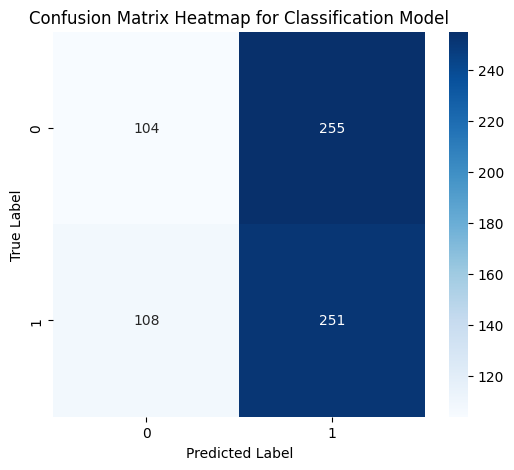

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap for Classification Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Visualize Regression Model Performance

### Subtask:
Generate a scatter plot comparing the actual 'GPA' values against the regression model's predicted 'GPA' values to visualize its accuracy.


**Reasoning**:
To visualize the regression model's accuracy, I need to create a scatter plot of actual versus predicted GPA values, add a diagonal line for perfect prediction, and label the plot appropriately. I will use `matplotlib.pyplot` for this task.



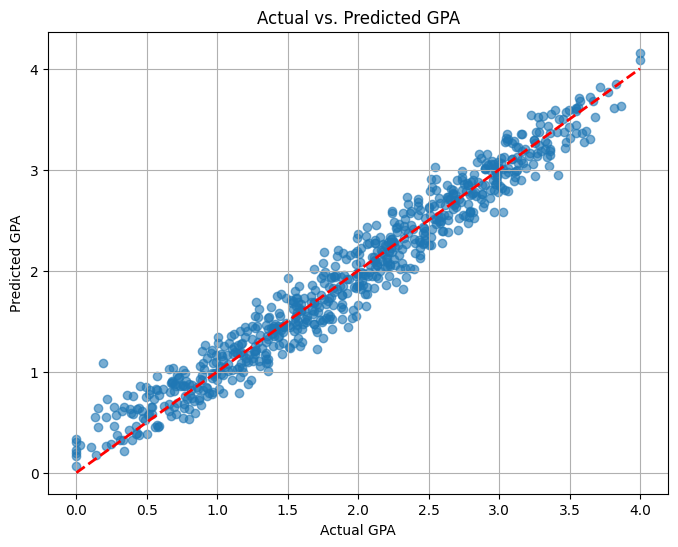

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the insights gained from the visualizations of both models.


## Summary:

### Data Analysis Key Findings

*   A heatmap of the classification model's confusion matrix was successfully generated, visually representing the model's performance by displaying predicted labels against true labels.
*   A scatter plot comparing actual 'GPA' values against the regression model's predicted 'GPA' values was successfully generated. This visualization included a diagonal line representing perfect predictions, allowing for a visual assessment of the regression model's accuracy.

### Insights or Next Steps

*   **For Classification Model:** Further analysis of the confusion matrix heatmap is needed to determine specific performance metrics such as accuracy, precision, recall, and F1-score for each class, which can guide model refinement.
*   **For Regression Model:** Evaluate how closely the scattered points align with the perfect prediction line on the actual vs. predicted GPA plot. If points are widely dispersed, consider further model tuning or feature engineering to improve predictive accuracy.
